In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime


 ## In this step we are going to load raw dataset using panda .


In [4]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


step 2 Tackling more in dataset structure
In this step, we explore the dataset to understand:
- The shape and dimensions (rows × columns)
- Column names and data types
- Summary statistics for numeric fields
- Missing values in the dataset

In [ ]:

print("Shape of the dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nDataset Info:")
df.info()
print("\nSummary Statistics:")
display(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())


Shape of the dataset: (200000, 9)

Column names: ['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB

Summary Statistics:


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000



Missing Values:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


## 3️⃣ Step 3: Clean the Data (Missing, Duplicates, Invalid Values)

To ensure high-quality analysis, we clean the dataset by:
- Removing missing values and duplicate rows
- Converting datetime strings to proper format
- Filtering out rows with invalid fares or passenger counts
- Removing trips with GPS coordinates outside NYC


In [ ]:

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
if df['pickup_datetime'].dtype == 'O':
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'].str.replace(" UTC", ""), errors='coerce')
else:
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df = df[df['fare_amount'] > 0]
df = df[(df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)]
df = df[
    (df['pickup_longitude'].between(-75, -72)) &
    (df['pickup_latitude'].between(40, 42)) &
    (df['dropoff_longitude'].between(-75, -72)) &
    (df['dropoff_latitude'].between(40, 42))
]
print("Shape after cleaning:", df.shape)


Shape after cleaning: (195100, 9)


In [ ]:
## 4️⃣ Step 4: Feature Engineering (Time-Based Columns)

#In this step, we extract new features from the `pickup_datetime` column:
###- `month`: Month (1–12)
#- `weekday`: Day name (Monday, Tuesday, etc.)
#- `is_peak`: Peak time flag (1 = peak, 0 = off-peak)

#These features will allow time-based insights in Power BI dashboards.


In [12]:
# Extract time components
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.day_name()

# Create peak hour flag (rush hours: 7–9 AM and 4–7 PM)
df['is_peak'] = df['hour'].apply(lambda x: 1 if (7 <= x <= 9) or (16 <= x <= 19) else 0)

# Check the new columns
df[['pickup_datetime', 'hour', 'day', 'month', 'weekday', 'is_peak']].head()


,pickup_datetime,hour,day,month,weekday,is_peak
0,2015-05-07 19:52:06,19,7,5,Thursday,1
1,2009-07-17 20:04:56,20,17,7,Friday,0
2,2009-08-24 21:45:00,21,24,8,Monday,0
3,2009-06-26 08:22:21,8,26,6,Friday,1
4,2014-08-28 17:47:00,17,28,8,Thursday,1


## 5️⃣ Step 5: Export Cleaned and Enhanced Dataset for Power BI

We export the cleaned and feature-engineered dataset to a CSV file that will be imported into Power BI for further analysis and visualization.


In [15]:
# Export cleaned dataset for Power BI
df.to_csv('uber_cleaned.csv', index=False)

# Export enhanced dataset with new features
df.to_csv('uber_enhanced.csv', index=False)

print("Datasets exported successfully!")


Datasets exported successfully!


## 6️⃣ Step 6: Exploratory Visualizations in Python

Before moving into Power BI, we perform quick visual analysis using Seaborn and Matplotlib to explore:
- Fare amount distribution
- Average fare by hour of the day
- Average fare by day of the week
- Fare amount vs. number of passengers


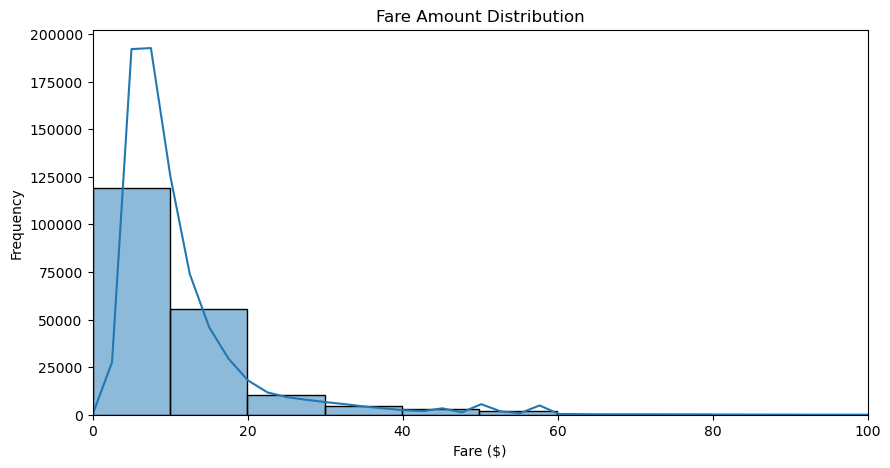

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Fare Amount Distribution')
plt.xlabel('Fare ($)')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Optional: zoom in under $100
plt.show()


Average Fare by Hour

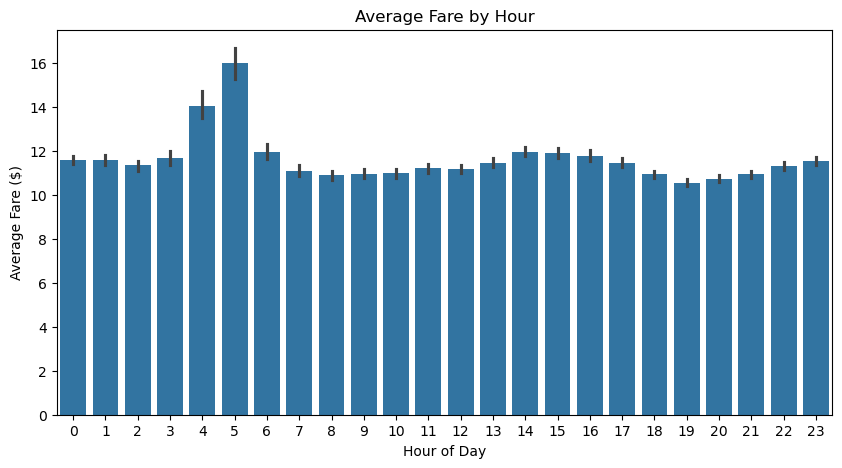

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x='hour', y='fare_amount', data=df)
plt.title('Average Fare by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare ($)')
plt.show()


Average Fare by Weekday

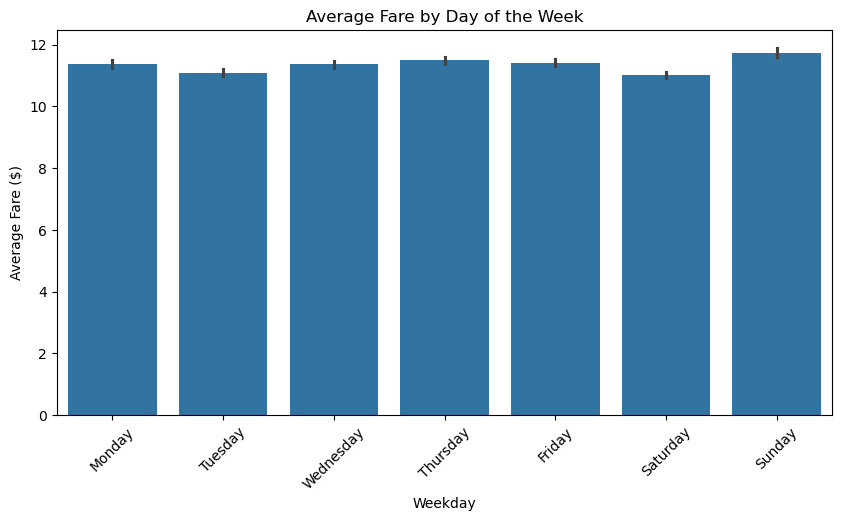

In [18]:
plt.figure(figsize=(10, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x='weekday', y='fare_amount', data=df, order=order)
plt.title('Average Fare by Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=45)
plt.show()


Fare by Passenger Count

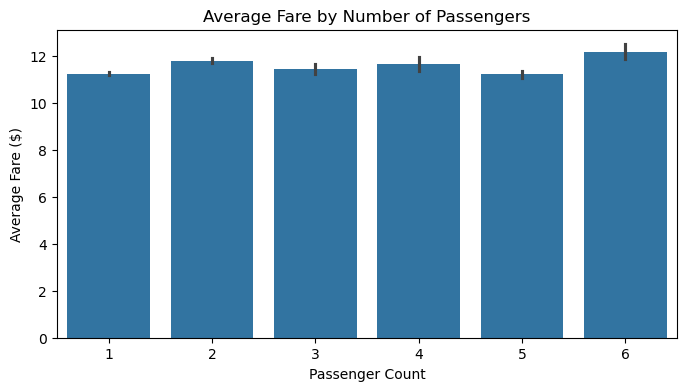

In [19]:
plt.figure(figsize=(8, 4))
sns.barplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Average Fare by Number of Passengers')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare ($)')
plt.show()


## 📊 Step 6.1: Fare Distribution & Relationship Analysis in Python

In this section, we visualize:
- Distribution of fare amounts
- Relationship between fare and hour of day
- (Optional) Relationship between fare and trip distance
- Other key trends like passenger count or peak hours


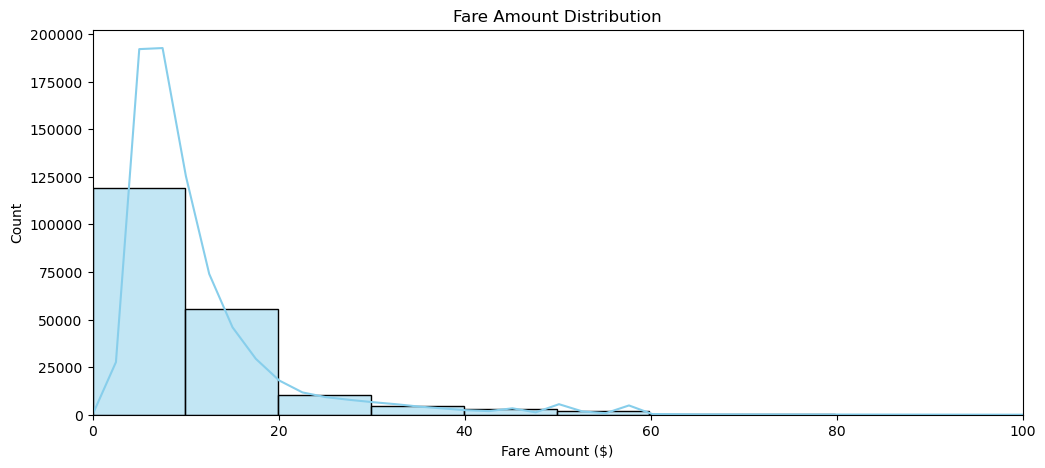

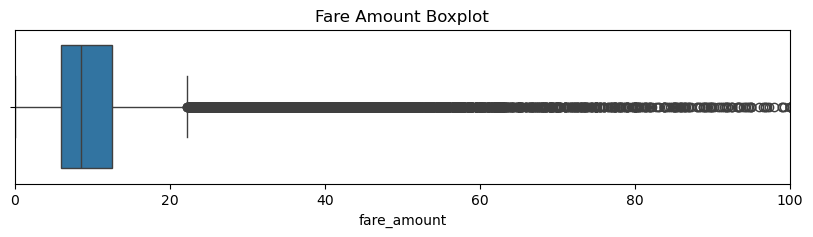

In [20]:
plt.figure(figsize=(12, 5))
sns.histplot(df['fare_amount'], bins=50, kde=True, color='skyblue')
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount ($)')
plt.xlim(0, 100)  # Ignore extreme outliers
plt.show()

# Box plot
plt.figure(figsize=(10, 2))
sns.boxplot(x='fare_amount', data=df)
plt.title('Fare Amount Boxplot')
plt.xlim(0, 100)
plt.show()


Fare Amount vs Hour of the Day

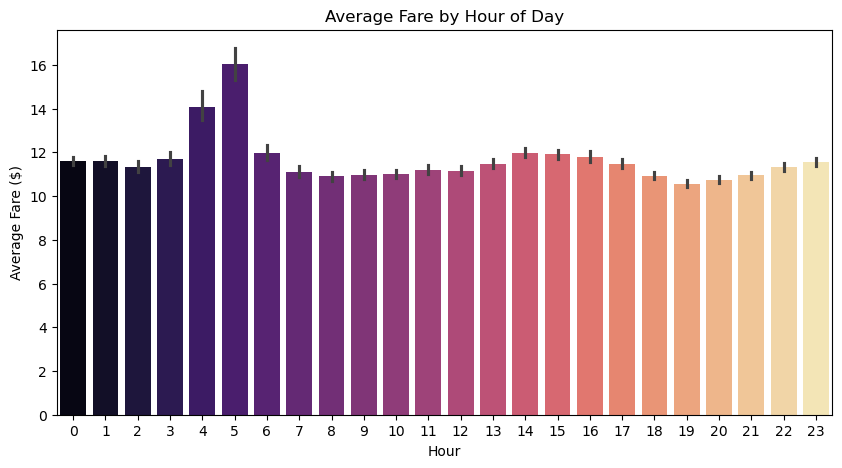

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(x='hour', y='fare_amount', data=df, estimator=np.mean, palette='magma')
plt.title('Average Fare by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Fare ($)')
plt.show()


Fare Amount vs Weekday

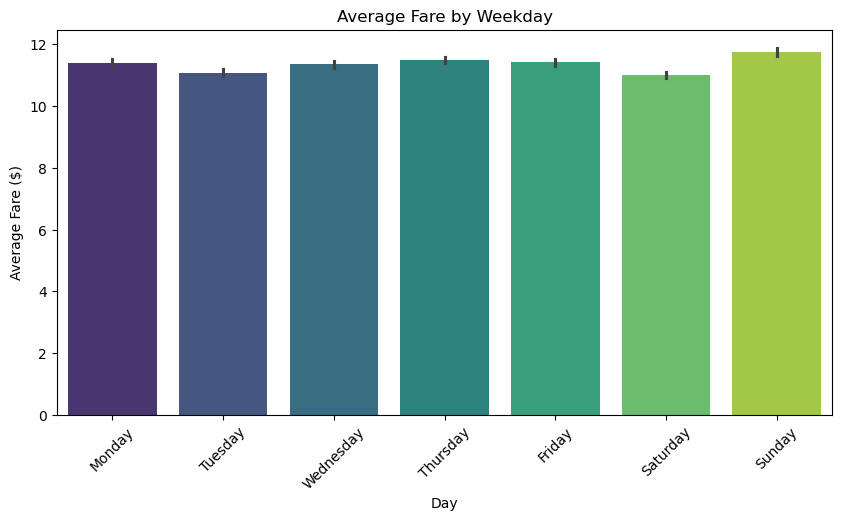

In [22]:
plt.figure(figsize=(10, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x='weekday', y='fare_amount', data=df, order=order, estimator=np.mean, palette='viridis')
plt.title('Average Fare by Weekday')
plt.xlabel('Day')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=45)
plt.show()


Fare Amount vs Passenger Count

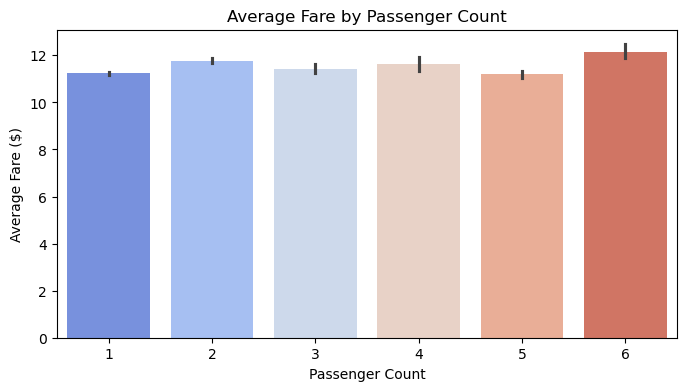

In [23]:
plt.figure(figsize=(8, 4))
sns.barplot(x='passenger_count', y='fare_amount', data=df, estimator=np.mean, palette='coolwarm')
plt.title('Average Fare by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare ($)')
plt.show()


## 📊 Step 6.2: Correlation Heatmap

The heatmap below visualizes how strongly numeric variables are correlated. This helps identify meaningful relationships such as:
- Fare amount vs. trip distance
- Fare amount vs. hour of day


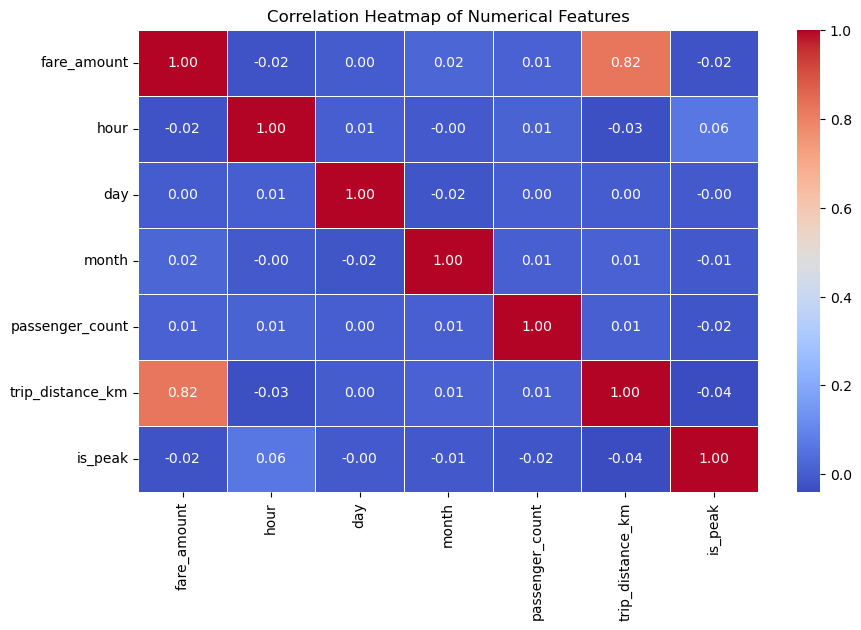

In [ ]:

correlation_columns = ['fare_amount', 'hour', 'day', 'month', 'passenger_count', 'trip_distance_km', 'is_peak']

corr_matrix = df[correlation_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
